# Análise de risco de crédito 

### A análise de risco de crédito se refere ao ato de determinar o risco de não cumprimento das obrigações de dívida que um recebedor de crédito apresenta, essa análise é importante para os bancos já que quando um recebedor de crédito não paga o empréstimo o banco sofre um prejuízo, e quando paga, o banco lucra, então fazer esse tipo de controle a análise para a concessão do crédito é essencial para dar mais estabilidade financeira e manter a reputação do banco.

### A forma convencional de se fazer o controle da concessão de crédito é criando modelos matemáticos que observam algumas características dos solicitadores de crédito e baseado nessas características associar um score que vai de 0 a 1 para o cliente, onde 1 indica um bom pagador e 0 indica um mal pagador, e baseado nesse score que representa a probabilidade do cliente pagar o empréstimo tomar a decisão de conceder crédito.

### Podemos utilizar várias variáveis para usar no modelo e olhando do ponto de vista do banco que tem acesso a mais informações poderíamos até usar algumas específicas para cada perfil de cliente, por exemplo para um cliente comum que não faz investimentos poderíamos utilizar um determinado conjunto de variáveis, e para um clinte que faz investimentos na própria plataforma do banco poderíamos utilizar outro conjunto de variáveis que consideram o histórico de investidor do cliente, e complicar ainda mais essa brincadeira.

### No meu caso estou utilizando um dataset que encontrei na plataforma do Kaggle que contém alguns dados socioeconomicos, e a razão para usar este dataset é que é um pouco difícil de encontrar dados sobre análise de risco de crédito porque esses dados são sensíveis e pode ser perigoso liberar estes dados em público, na página do dataset não é informada a origem destes dados e não tem nenhum descrição além das variáveis:

### Descrever variáveis: 



 - person_age : Idade da pessoa pedindo o empréstimo.

 - person_income : Renda da pessoa

 - person_home_ownership : A casa em que a pessoa vive pertence a ela ou é alugada?

 - person_emp_length : A quanto tempo a pessoa está empregada em anos.

 - loan_intent : Qual a intenção da pessoa ao pedir o empréstimo? existem algumas opções prontas, como por razoes medicas, educação entre outras. 

 - loan_grade : grau de empréstimo

 - loan_amnt : qual a quantidade do empréstimo?

 - loan_int_rate : Taxa de juro

 - loan_percent_income : Renda percentual

 - cb_person_default_on_file : se a pessoa já teve histórico de inadimplência antes ou não.

 - cb_preson_cred_hist_length : tamanho do histórico da pessoa, em anos.

 - loan_status : situação do empréstimo é a nossa variável alvo \
  1 indica inadimplência \
   0 indica não inadimplência.

Link para o dataframe utilizado: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve
from matplotlib import pyplot

In [3]:
df = pd.read_csv('credit_risk_dataset.csv', sep = ',')

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Vamos observar os tipos dos dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
print('Temos',df.shape[0], 'linhas e', df.shape[1], 'colunas')

Temos 32581 linhas e 12 colunas


Vamos observar se temos dados faltantes

In [7]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Temos 895 dados faltantes sobre a informação de quanto tempo a pessoa está empregada, e 3116 dados faltantes da taxa de juros do empréstimo, e ambos são um número grande de dados faltantes.

# Análise descritiva

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


### Assim podemos obseravr a distribuição das variáveis numéricas

### Podemos observar que a idade média é de 27 anos 
### A renda média das pessoas é 66074 unidades de moeda. 
### O tempo médio em que as pessoas então empregadas é de 4 anos 
### O tamanho médio dos empréstimos é de 9589 
### A taxa de juros média é de 11% 
### A renda percentual do empréstimo é de 0.17 
### O histórico médio em anos na instituição é de 5-6 anos. 


## Vamos observar se existe diferença na distribuições das variáveis numéricas entre os inadimplentes e os não inadimplentes

In [9]:
df_inad = df[ df['loan_status'] == 1 ]
df_n_inad = df[ df['loan_status'] == 0 ]

In [10]:
print('Distribuição das variáveis numérica do grupo de inadimplentes, que são', df_inad.shape[0],'observações')
df_inad.describe().T

Distribuição das variáveis numérica do grupo de inadimplentes, que são 7108 observações


,count,mean,std,min,25%,50%,75%,max
person_age,7108.0,27.474676,6.263642,20.00,23.00,26.00,30.00,70.00
person_income,7108.0,49125.652223,36907.376527,4000.00,30000.00,41498.00,59497.75,703800.00
person_emp_length,6826.0,4.137562,4.126956,0.00,1.00,3.00,6.00,123.00
loan_amnt,7108.0,10850.502954,7143.345344,900.00,5000.00,9600.00,15000.00,35000.00
loan_int_rate,6464.0,13.060207,3.293167,5.42,10.74,13.49,15.58,23.22
loan_status,7108.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
loan_percent_income,7108.0,0.246889,0.132148,0.01,0.14,0.24,0.34,0.78
cb_person_cred_hist_length,7108.0,5.685003,4.103208,2.00,3.00,4.00,8.00,30.00


In [11]:
print('Distribuição das variáveis numérica do grupo de não inadimplentes', df_n_inad.shape[0],'observações')
df_n_inad.describe().T

Distribuição das variáveis numérica do grupo de não inadimplentes 25473 observações


,count,mean,std,min,25%,50%,75%,max
person_age,25473.0,27.807129,6.369669,20.00,23.00,26.00,30.00,144.00
person_income,25473.0,70804.361559,66568.802606,7000.00,42000.00,60000.00,84000.00,6000000.00
person_emp_length,24860.0,4.968745,4.129022,0.00,2.00,4.00,7.00,123.00
loan_amnt,25473.0,9237.464178,6026.375457,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,23001.0,10.435999,2.982190,5.42,7.68,10.59,12.69,22.06
loan_status,25473.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
loan_percent_income,25473.0,0.148805,0.087252,0.00,0.08,0.13,0.20,0.83
cb_person_cred_hist_length,25473.0,5.837475,4.040900,2.00,3.00,4.00,8.00,30.00


### Podemos observar algumas diferenças nos grupos: 
### Temos uma diferença média na renda, com a renda média dos inadimplentes menor do que a dos não inadimplentes 
### No tamanho médio dos empréstimos no grupo dos inadimplentes é um pouco maoir do que no grupo dos não inadimplentes
### Na taxa de juros do grupo de inadimplentes, onde a taxa média de juros é de 12% e no grupo dos não inadimplentes é 10%
### No renda percentual média do empréstimo no grupo de inadimplentes é 0.24 e dos não inadimplentes é 0.14.
### Também temos mais algumas pequenas diferenças nos quartis da distribuição de algumas variáveis como a person_emp_length.
### Também podemos observar que nem sempre fazer gráficos é a melhor forma de visualizar os dados dependendo dos seus objetivos, se neste caso estivessemos utilizando gráficos teríamos mais trabalho, cada linha da tabela se tornaria um gráfico e pra comparar as distribuições dos grupos teríamos que bater grafico por gráfico e levaria mais tempo. 

### porcentagem de inadimplentes

In [12]:
prop = df['loan_status'].value_counts(normalize=True)*100
print(' Porcentagem de não inadimplentes:', prop[0], '\n', 'porcentagem de inadimplentes', prop[1])

 Porcentagem de não inadimplentes: 78.18360394094718 
 porcentagem de inadimplentes 21.816396059052824


### Podemos observar que o nosso dataset é desbalanceado em relação a nossa variável resposta, essa informação é importante pois ela modifica todo o leque de métodos e técnicas que são apropriados de serem utilizados em um dataset desbalanceado, por exemplo quando formos validar o nosso modelo vamos precisar fazer um stratified splitting para fazer a validação do nosso modelo ao invés do convencional random splitting feito no cross validation. 

## Em relação aos dados faltantes

### Será que existe uma diferença no status das pessoas com dados faltantes e não faltantes? Vamos testar para o pessoal com a taxa de juros faltando

In [13]:
df_na_juro = df[ df['loan_int_rate'].isna()]
df_juro = df[ ~df['loan_int_rate'].isna()]
print('número de linhas com taxa de juros', df_juro.shape[0], 'número de linhas sem taxa de juro', df_na_juro.shape[0] )

número de linhas com taxa de juros 29465 número de linhas sem taxa de juro 3116


In [14]:
print('Proporção de inadimplência nos dados com juros faltantes')
df_na_juro['loan_status'].value_counts(normalize=True)*100

Proporção de inadimplência nos dados com juros faltantes


0    79.332478
1    20.667522
Name: loan_status, dtype: float64

In [15]:
print('Proporção de inadimplência nos dados com juros informado')
df_juro['loan_status'].value_counts(normalize=True)*100

Proporção de inadimplência nos dados com juros informado


0    78.062108
1    21.937892
Name: loan_status, dtype: float64

### Podemos observar que temos aproximadamente a mesma proporção entre os dados com a taxa de juros informada e não informada

### Vamos obsersar a distribuição da taxa de juros para verificarmos o que podemos fazer com esses dados faltantes

In [16]:
juro_q = df['loan_int_rate'].describe()
juro_q

count    29465.000000
mean        11.011695
std          3.240459
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

### Temos uma variação um pouco grande considerando o contexto que é a taxa de juros, seria adequado observar se existe diferença na inadimplência nos empréstimos com maiores taxa de juros e nos menores, vamos observar considerando que pessoas com a taxa de juros maior do que o terceiro quartil tem a taxa de juros alto, e observações com a taxa de juros menor que o primeiro quartil tem taxa de juros baixa.

In [17]:
df_juro_baixo = df[ df['loan_int_rate'] <= juro_q[4] ]
df_juro_alto = df[ df['loan_int_rate'] >= juro_q[6] ]

In [18]:
print('Proporção de inadimplência no grupo de pessoas com taxa de juro menor que o primeiro quartil')
df_juro_baixo['loan_status'].value_counts(normalize=True)*100

Proporção de inadimplência no grupo de pessoas com taxa de juro menor que o primeiro quartil


0    90.614928
1     9.385072
Name: loan_status, dtype: float64

In [19]:
print('Proporção de inadimplência no grupo de pessoas com taxa de juro maior que o terceiro quartil')
df_juro_alto['loan_status'].value_counts(normalize=True)*100

Proporção de inadimplência no grupo de pessoas com taxa de juro maior que o terceiro quartil


0    55.789333
1    44.210667
Name: loan_status, dtype: float64

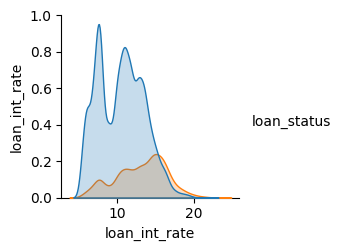

In [20]:
sns.pairplot(data = df, hue='loan_status', vars = ['loan_int_rate'])

### Insights: maiores taxas de juros estão associadas a maiores taxas de inadimplência.

### Encontramos que a inadimplência é maior no grupo que tem maior taxa de juros, sendo quase metade desse grupo.

## Atenção ao substituir dados faltantes

### Podemos  substituir os dados faltantes pela média para não causar muitos impactos na distribuição dos dados, mas desse modo corremos o risco de causar ruído na hora de prever nossa variável resposta porque temos uma diferença na proporção de pessoas inadimplentes dependendo do quantil que a taxa de juros pertence, uma alternativa seria verificar se as outras variáveis fazem a previsão da taxa de juros com boa acurácia e usar as outras variáveis não faltantes para fazer a previsão da taxa de juros e gerar menos ruído entre o grupo de inadimplentes e não inadimplentes.
### É considerado mais recomendado preencher os dados faltantes quando dividirmos os dados para treino e teste, porque em um ambiente de produção não teríamos acesso a todo o banco de dados, apenas uma amostra e a média sobre a taxa de juros que temos seria diferente para a amostra e os dados completos.

In [21]:
temp_emp_q = df['person_emp_length'].describe()

### Vamos verificar se existe diferença na distribuição dos anos que a pessoa está empregada entre os inadimplentes e não inadimplentes.

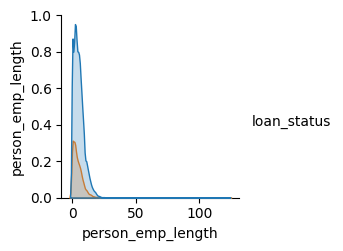

In [22]:
sns.pairplot(data = df, hue='loan_status', vars = ['person_emp_length'])

### insight: a maior parte da distribuição dos inadimplentes está em valores mais baixo indicando que tem menor tempo de carreira.

In [23]:
df_emp_baixo = df[ df['person_emp_length'] <= temp_emp_q[4] ]
df_emp_alto = df[ df['person_emp_length'] >= temp_emp_q[6] ]

In [24]:
print('Proporção de inadimplência no grupo de pessoas com menor tempo de carreira')
df_emp_baixo['loan_status'].value_counts(normalize=True)*100

Proporção de inadimplência no grupo de pessoas com menor tempo de carreira


0    72.950593
1    27.049407
Name: loan_status, dtype: float64

In [25]:
print('Proporção de inadimplência no grupo de pessoas com mais tempo de carreira')
df_emp_alto['loan_status'].value_counts(normalize=True)*100

Proporção de inadimplência no grupo de pessoas com mais tempo de carreira


0    82.738028
1    17.261972
Name: loan_status, dtype: float64

### insigths: Existe uma pequena diferença na proporção de inadimplentes e não inadimplentes em relação aos primeiro e terceiro quartil da distribuição do tempo de carreira das pessoas em anos. 

## Verificando a correlação entre as vvariáveis numéricas 

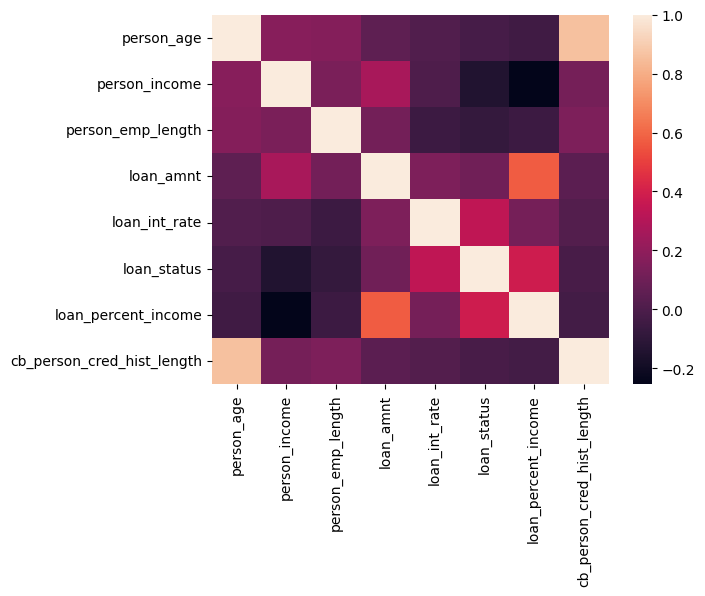

In [26]:
corr_matrix = df.corr( method = 'pearson', numeric_only = True)
sns.heatmap(corr_matrix)
plt.show()

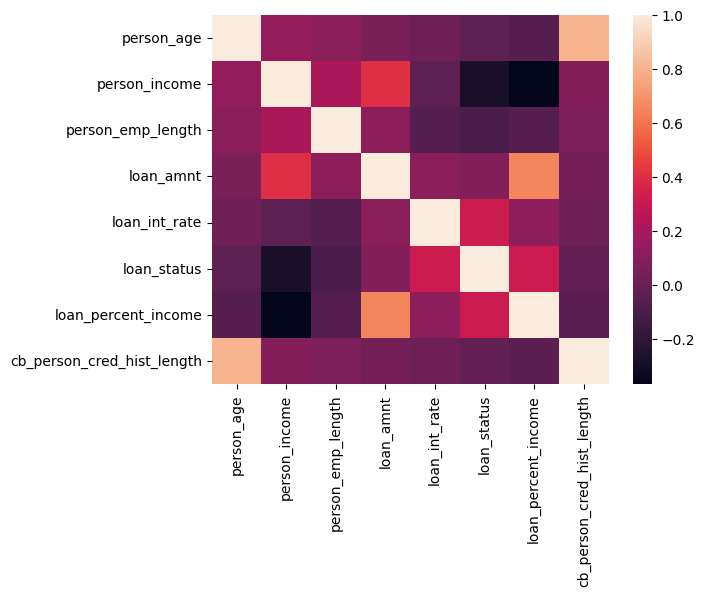

In [27]:
corr_matrix = df.corr( method = 'spearman', numeric_only = True)
sns.heatmap(corr_matrix)
plt.show()

### Considerando a correlação linear de pearson e a correlação não-paramétrica de spearman observamos que em geral não existe correlações muito fortes entre as variáveis.

## Pairplots 

In [28]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

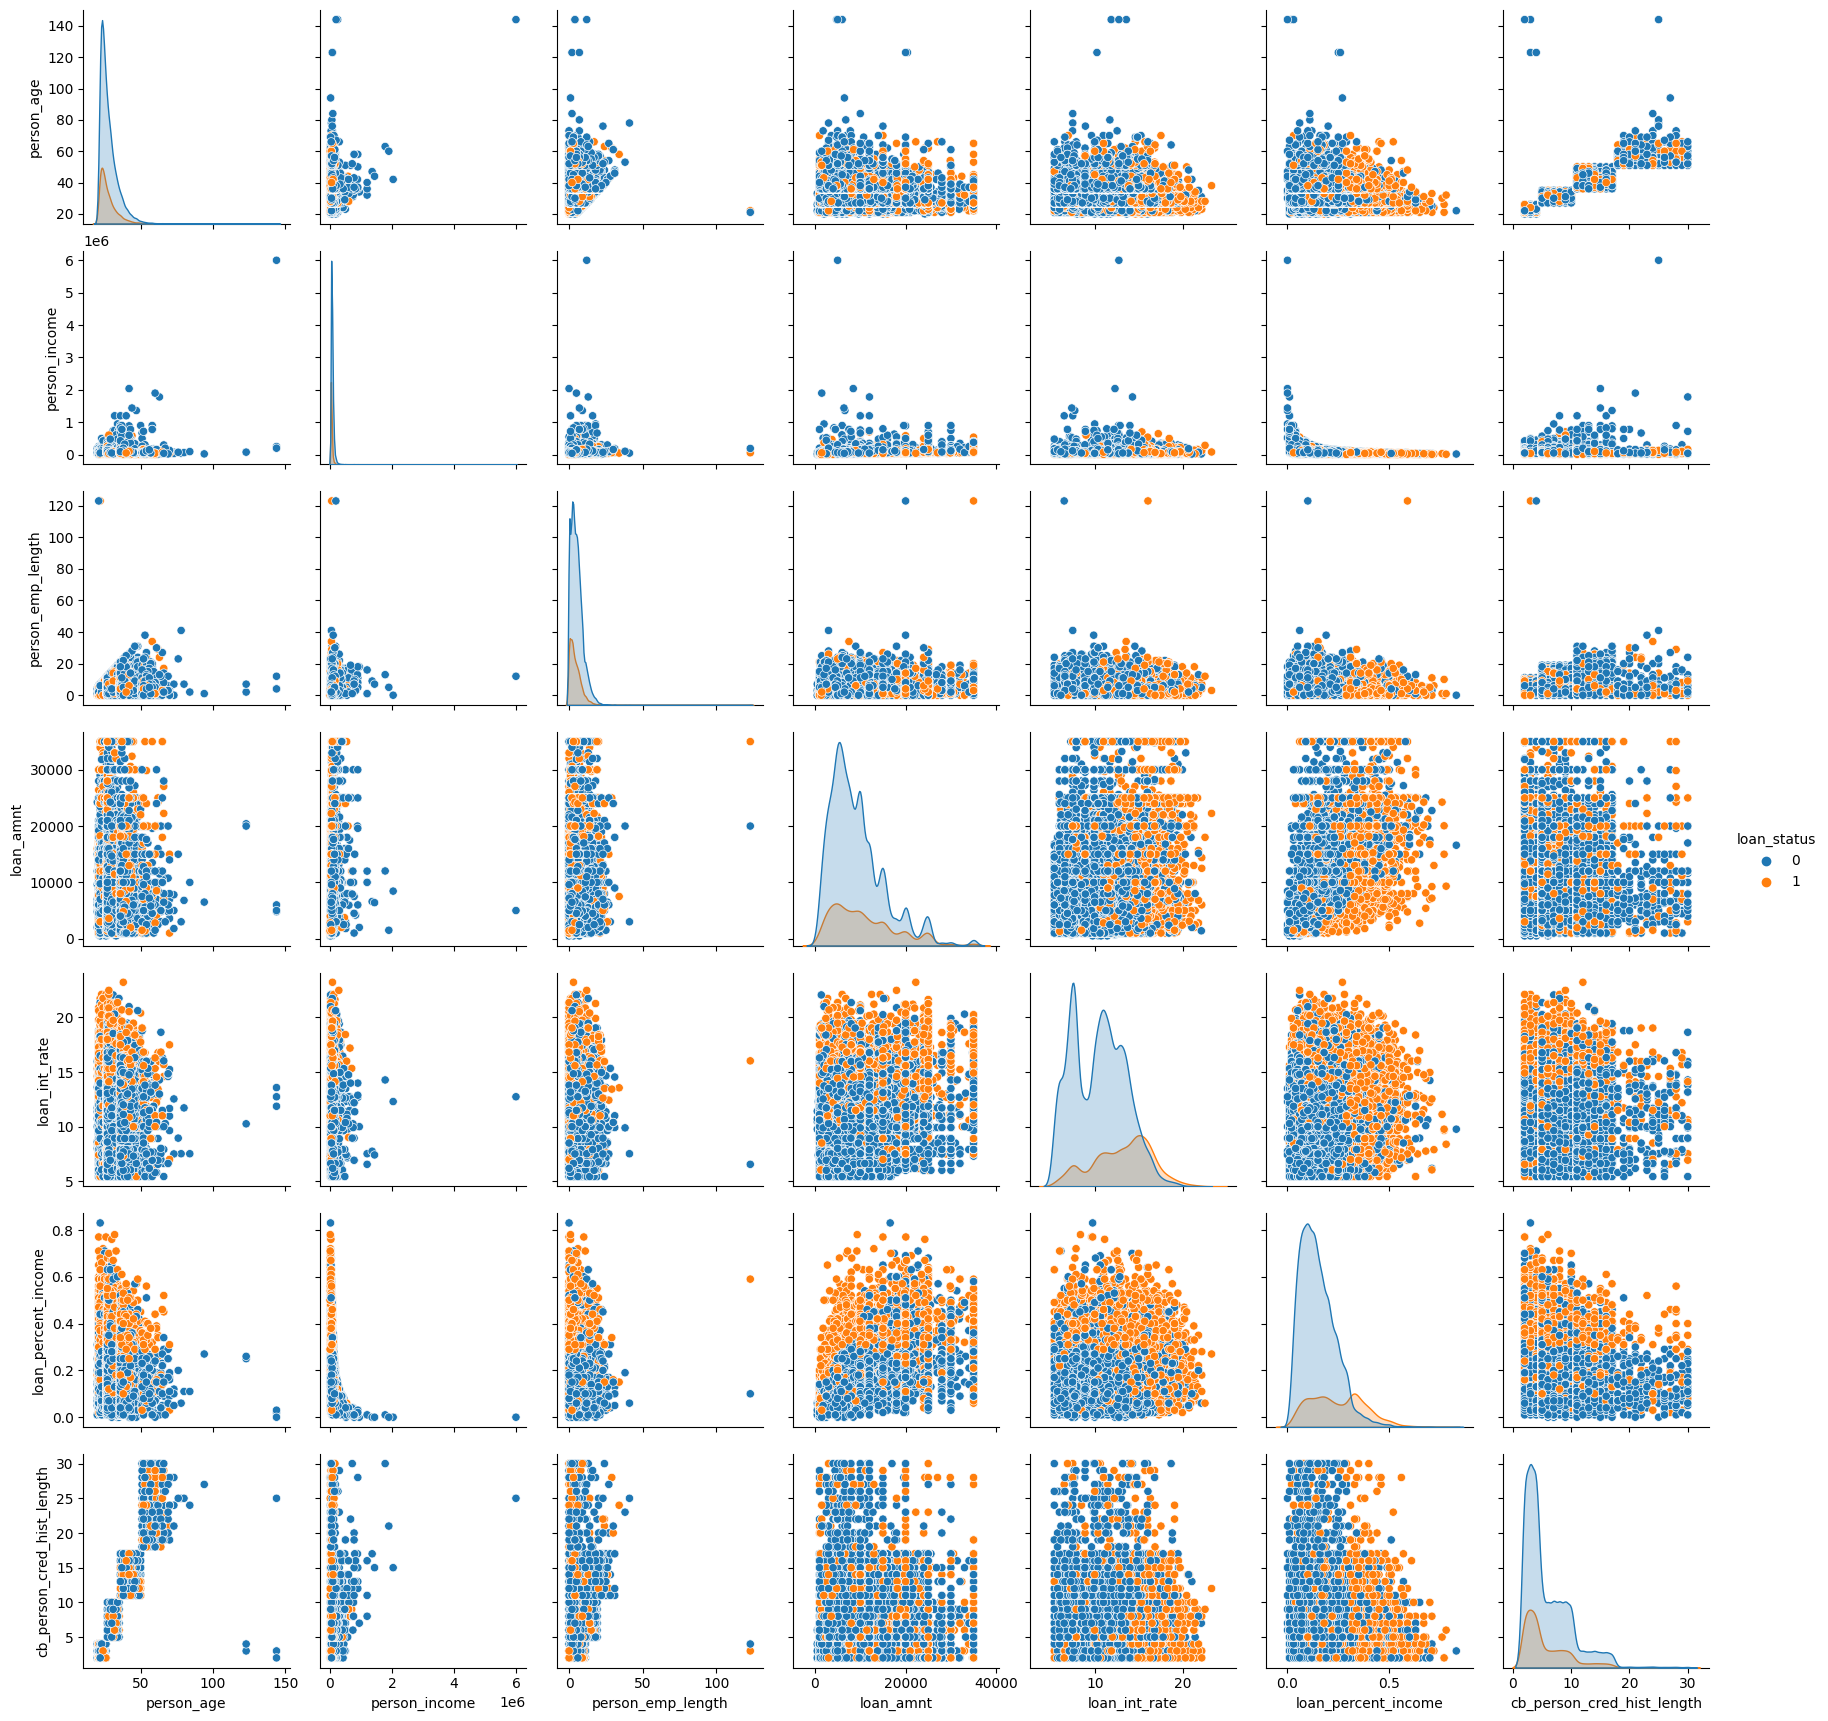

In [29]:
sns.pairplot(data = df, hue='loan_status', vars = ['person_age', 'person_income',
       'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])

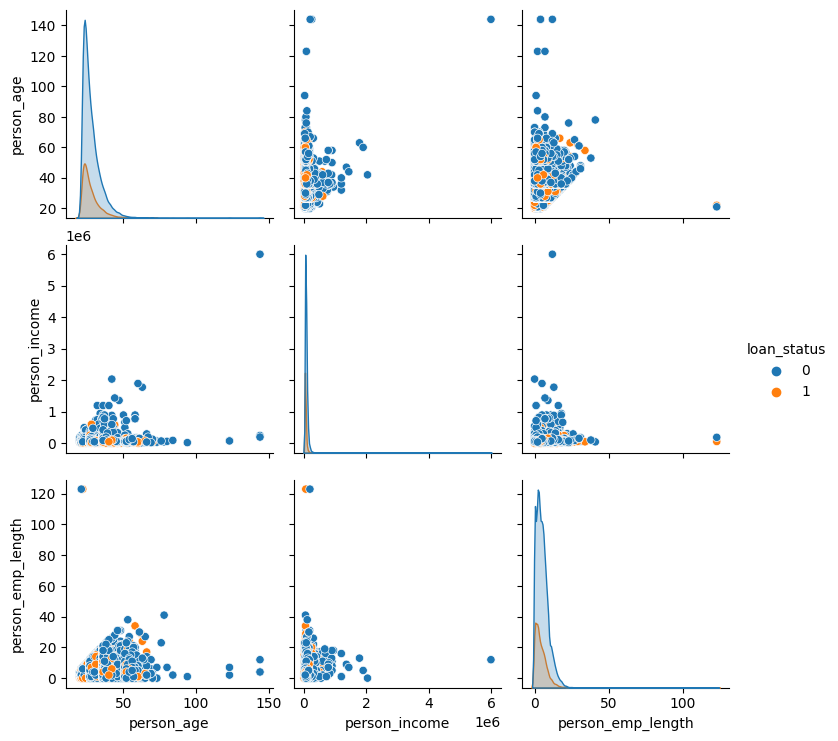

In [30]:
sns.pairplot(data = df, hue='loan_status', vars = ['person_age', 'person_income', 'person_emp_length'])

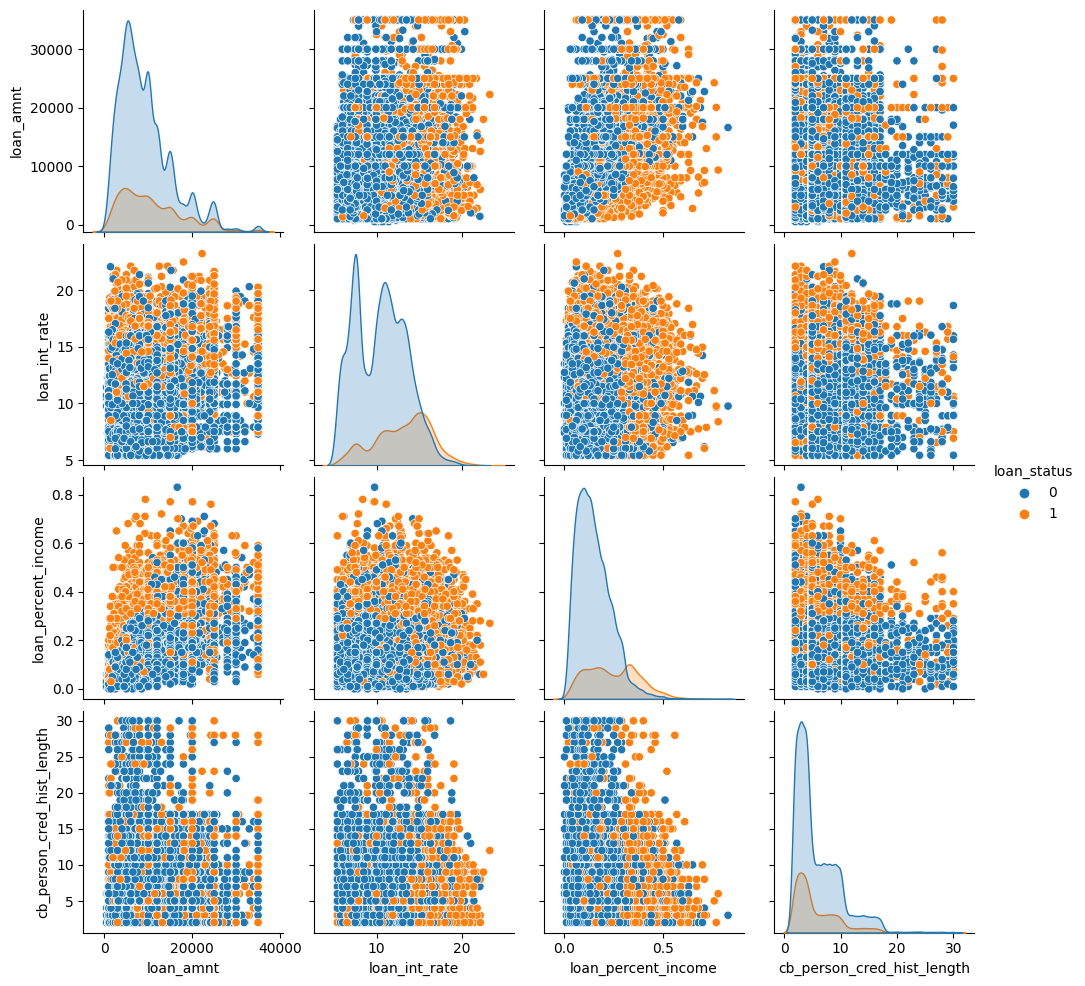

In [31]:
sns.pairplot(data = df, hue='loan_status', vars = ['loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'] )

### Podemos observar uma espécie de agrupamento entre os inadimplentes e não inadimplentes em algumas relação entre as variáveis numéricas, por exemplo entre loan_percent_income e quantos anos de histórico a pessoa tem na instituição, entre a taxa de juros e o loan_percent_income, loan_amount e loan_percent_income.

In [32]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [33]:
plot_home = df[['person_home_ownership','loan_status']].groupby(['person_home_ownership','loan_status']).value_counts()

<Axes: xlabel='person_home_ownership'>

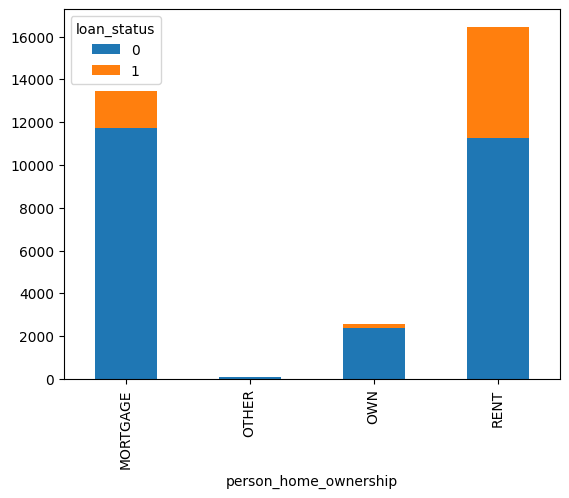

In [34]:
plot_home.unstack().plot.bar(stacked=True)

### Podemos observar que temo uma taxa de inadimplentes menor nas pessoas que são donas da própria casa em que residem.

<Axes: xlabel='loan_intent'>

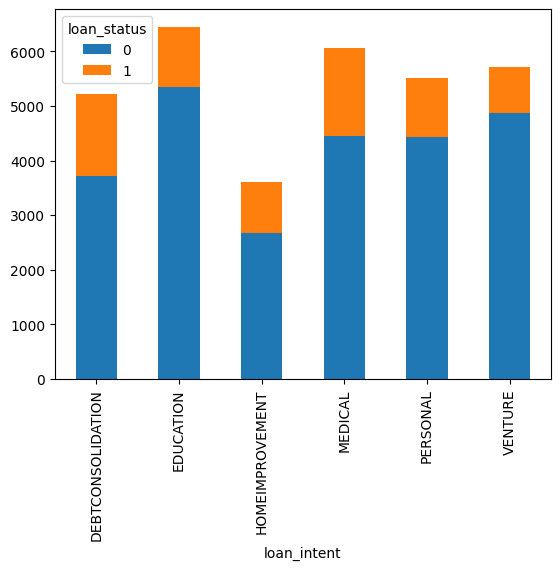

In [35]:
plot_intent = df[['loan_intent','loan_status']].groupby(['loan_intent','loan_status']).value_counts()
plot_intent.unstack().plot.bar(stacked=True)

<Axes: xlabel='loan_grade'>

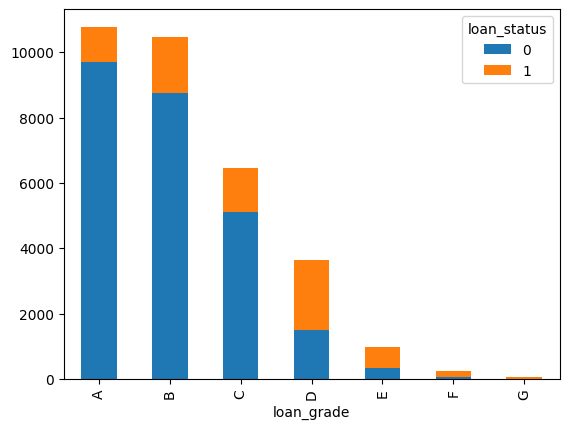

In [36]:
plot_grade = df[['loan_grade','loan_status']].groupby(['loan_grade','loan_status']).value_counts()
plot_grade.unstack().plot.bar(stacked=True)

Insights: 
 Aproximadamente a mesma proporção de inadimplenetes e não inadimplentes entre os grupos.

## Classificação

### Vamos considerar que neste caso seja importante conseguirmos interpretar o modelo, por conta da necessidade de justificar o porque uma pessoa recebeu crédito e outra não recebeu crédito.

### Um modelo muito bom para classificação e que nos fornece da interpretação é a regressão logística, porém ele só aceita variáveis numéricas como input, então vamos fazer um tratamento nas variáveis categóricas para ajustarmos o modelo.

In [37]:
# teste 1 certo, com var ordinal
y = df['loan_status']

encoder = OrdinalEncoder(categories=[['A', "B", "C", "D", 'E', 'F', 'G']])
X = pd.get_dummies(df, columns=[ 'loan_intent', 'person_home_ownership', 'cb_person_default_on_file'])
X = X.drop('loan_status', axis = 1)
X['loan_grade'] = encoder.fit_transform(X[['loan_grade']])


In [38]:
X.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,3.0,35000,16.02,0.59,3,0,0,0,0,1,0,0,0,0,1,0,1
1,21,9600,5.0,1.0,1000,11.14,0.10,2,0,1,0,0,0,0,0,0,1,0,1,0
2,25,9600,1.0,2.0,5500,12.87,0.57,3,0,0,0,1,0,0,1,0,0,0,1,0
3,23,65500,4.0,2.0,35000,15.23,0.53,2,0,0,0,1,0,0,0,0,0,1,1,0
4,24,54400,8.0,2.0,35000,14.27,0.55,4,0,0,0,1,0,0,0,0,0,1,0,1


### Divisão estratificada dos dados para fazermos cross validation

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , test_size=0.2, random_state=42)

### Agora vamos substituir os dados faltantes

In [40]:
X_train['loan_int_rate'] = X_train['loan_int_rate'].fillna(np.mean(X_train['loan_int_rate']))
X_train['person_emp_length'] = X_train['person_emp_length'].fillna(np.mean(X_train['person_emp_length']))

X_test['loan_int_rate'] = X_test['loan_int_rate'].fillna(np.mean(X_test['loan_int_rate']))
X_test['person_emp_length'] = X_test['person_emp_length'].fillna(np.mean(X_test['person_emp_length']))


### Ajustando o modelo de regressão logística

Estou ajustando usando duas bibliotecas diferentes, porque o modelo do statsmodel mostra uma descrição do modelo mais fácil de ser visualizada.

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)
model1 = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.352015
         Iterations 7


In [42]:
y_pred = model.predict(X_test)
y_predm1 = model1.predict(X_test)

In [43]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                26064
Model:                          Logit   Df Residuals:                    26046
Method:                           MLE   Df Model:                           17
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                  0.3289
Time:                        13:09:51   Log-Likelihood:                -9174.9
converged:                       True   LL-Null:                       -13672.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
person_age                        -0.0032      0.006     -0.531      0.595      -0.015       0.009
person_income                   5.264e-07   3.29e-07      1.602      0.

### Podemos observar o valor dos coeficientes e seus respectivos p-valores, desvio padrão da estimativa dos coeficientes e intervalo de confiança.
### A idade da pessoa tem coeficiente negativo indicando que quando a idade aumenta a chance de inadimplência diminui, o mesmo com a renda da pessoa, o tempo em que a pessoa está empregada, a quantidade no empréstimo, taxa de juros, todas as intenções para o empréstimo e quando a pessoa possui a própria residência. 

In [44]:
print(model1.params < 0 )

person_age                         True
person_income                     False
person_emp_length                  True
loan_grade                        False
loan_amnt                          True
loan_int_rate                      True
loan_percent_income               False
cb_person_cred_hist_length        False
loan_intent_DEBTCONSOLIDATION      True
loan_intent_EDUCATION              True
loan_intent_HOMEIMPROVEMENT        True
loan_intent_MEDICAL                True
loan_intent_PERSONAL               True
loan_intent_VENTURE                True
person_home_ownership_MORTGAGE     True
person_home_ownership_OTHER        True
person_home_ownership_OWN          True
person_home_ownership_RENT         True
cb_person_default_on_file_N        True
cb_person_default_on_file_Y        True
dtype: bool


### quais coeficientes possuem p-valor maior que o nível de significância de 5%?

In [45]:
print(model1.pvalues >= 0.05 )

person_age                         True
person_income                      True
person_emp_length                  True
loan_grade                        False
loan_amnt                         False
loan_int_rate                      True
loan_percent_income               False
cb_person_cred_hist_length         True
loan_intent_DEBTCONSOLIDATION      True
loan_intent_EDUCATION              True
loan_intent_HOMEIMPROVEMENT        True
loan_intent_MEDICAL                True
loan_intent_PERSONAL               True
loan_intent_VENTURE                True
person_home_ownership_MORTGAGE     True
person_home_ownership_OTHER        True
person_home_ownership_OWN          True
person_home_ownership_RENT         True
cb_person_default_on_file_N        True
cb_person_default_on_file_Y        True
dtype: bool


### Apenas a intenção de melhorar a residência, possuir e própria residência, e se a pessoa já foi inadimplente que possuem p-valor maior que 0.05 o p-valor pode ser menor do que 0.05 por conta da aleatoriedade mesmo ou estas variáveis não agregam tanto assim para a predição mesmo.

In [46]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred, labels=model.classes_)
report = classification_report(y_test, y_pred)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred, labels=model.classes_)
report = classification_report(y_test, y_pred)

In [48]:
print("Acurácia:",accuracy)

Acurácia: 0.8029768298296762


In [49]:
print('report:', report)

report:               precision    recall  f1-score   support

           0       0.81      0.98      0.89      5095
           1       0.72      0.16      0.26      1422

    accuracy                           0.80      6517
   macro avg       0.76      0.57      0.57      6517
weighted avg       0.79      0.80      0.75      6517



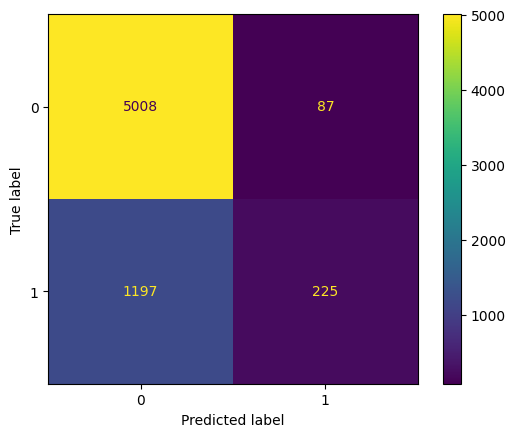

In [50]:

disp = ConfusionMatrixDisplay(confusion_matrix=confusion,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [51]:
print('Precisão é aproximadamente 72,11%' )
print('Sensitividade é aproximadamente 15,82%')
print('Especifidade é aproximadamente 98,29%')

Precisão é aproximadamente 72,11%
Sensitividade é aproximadamente 15,82%
Especifidade é aproximadamente 98,29%


### O nosso modelo está com uma sensitividade baixa e uma especifidade alta, isso quer dizer que ele classifica os não inadimplentes de forma correta na maior parte das vezes que ele classifica como não inadimplente, mas quando ele classifica como inadimplente ele erra a maior parte das vezes, e que ele classifica inadimplentes como não inadimplentes com frequencia.

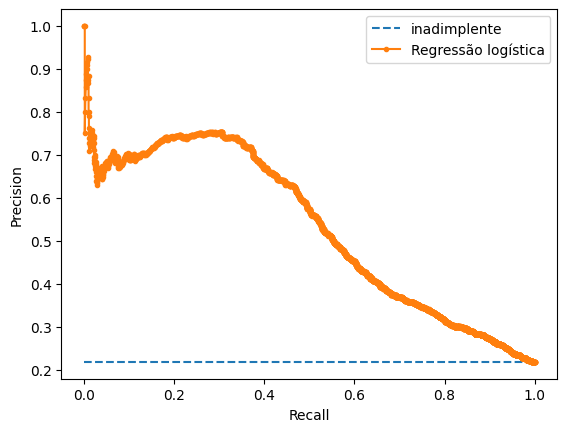

In [54]:
# probabilidade das predições
y_chapeu = model.predict_proba(X_test)
pos_probs = y_chapeu[:, 1] # prob de positivo.
# calculando linha de inadimplentes 
inadimplente = len(y[y==1])/len(y)

# plot da precision-recall curve do grupo de inadimplentes
pyplot.plot([0, 1], [inadimplente, inadimplente], linestyle='--', label='inadimplente')

# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Regressão logística')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()
